In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from glob import glob
from random import choice
from sklearn.metrics import r2_score

In [2]:
in_root = "../../data/output/xgbooster/"
test_root = "../../data/csv/aqi_csv_test/"

In [3]:
target_name = "API"

In [4]:
df = pd.read_csv(os.path.join(in_root, target_name, "prediction_output.csv"))
df['date'] = pd.to_datetime(df['date'])
df.set_index('id', inplace=True)
df.sort_values('date', inplace=True)

In [5]:
files = glob(os.path.join(in_root, target_name, "test/", "*.csv"))
cv = pd.concat([pd.read_csv(file) for file in files], ignore_index=True)
cv['date'] = pd.to_datetime(cv['date'])
cv.set_index('id', inplace=True)
cv.sort_values('date', inplace=True)

In [6]:
files = glob(os.path.join(test_root, "*.csv"))
test = pd.concat([pd.read_csv(file) for file in files], ignore_index=True)
test['date'] = pd.to_datetime(test['date'])
test.set_index('id', inplace=True)
test = test[["target_" + target_name, 'date']]
test.columns = pd.Index(['true', 'date'])
test.sort_values('date', inplace=True)

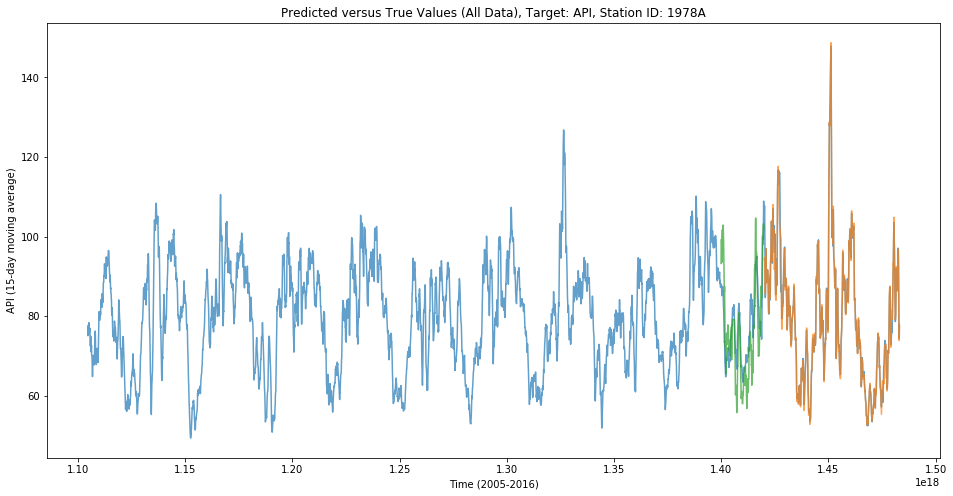

In [8]:
station_id = choice(test.index.unique())
# stations in Wuhan
# for station_id in ["1325A", "1326A", "1327A", "1328A", "1329A", "1330A", "1331A", "1332A", "1333A", "1334A"]:
plot_window = 15
# plot the trend
plt.figure(figsize=(16, 8))
plt.plot(df.loc[station_id, 'date'],
         df.loc[station_id, 'pred'].rolling(
             center=True, window=plot_window, min_periods=1).apply(np.nanmean),
         '-', alpha=0.7)
plt.plot(cv.loc[station_id, 'date'],
         cv.loc[station_id, 'true'].rolling(
             center=True, window=plot_window, min_periods=1).apply(np.nanmean),
         '-', alpha=0.7)
plt.plot(test.loc[station_id, 'date'],
         test.loc[station_id, 'true'].rolling(
             center=True, window=plot_window, min_periods=1).apply(np.nanmean),
         '-', alpha=0.7)
plt.title("Predicted versus True Values (All Data), Target: {}, Station ID: {}".format(
    target_name, station_id))
plt.xlabel("Time (2005-2016)")
plt.ylabel("{} ({}-day moving average)".format(target_name, plot_window))
plt.show()